In [22]:
#Using Google Colab Notebook

# !pip install investpy #Installing library to Fetch Data
# !pip install yfinance #Installing library to Fetch Date
# !pip install kats     #Install KATS Library
# !pip install --upgrade pip
#!pip install auto-ts  #It will install AUTO TS library 

In [3]:
#import libraries
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt
import warnings
from kats.consts import TimeSeriesData #already has lstm, and maybe all models
# from auto_ts import auto_timeseries #another auto ensembler

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
import investpy
from datetime import date
import plotly.graph_objects as go
import math
import yfinance as yf
import plotly.io as pio



##NIFTY 50 Forecasting Data



In [4]:
#Extracting Last 1 year data of NF using investpy library 
today = datetime.now()
today = today.strftime("%d/%m/%Y")
one_year= datetime.today() - timedelta(days=370)
one_year = one_year.strftime("%d/%m/%Y")

df = investpy.get_index_historical_data(index="Nifty 50",country="India",from_date=str(one_year),to_date= str(today))
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-07-26,15849.30,15893.35,15797.00,15824.45,267076681728,INR
2021-07-27,15860.50,15881.55,15701.00,15746.45,311012065280,INR
2021-07-28,15761.55,15767.50,15513.45,15709.40,318601592832,INR
2021-07-29,15762.70,15817.35,15737.80,15778.45,401584914432,INR
2021-07-30,15800.60,15862.80,15744.85,15763.05,400021225472,INR


In [ ]:
df.index

DatetimeIndex(['2021-07-20', '2021-07-22', '2021-07-23', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-08-02', '2021-08-03',
               ...
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [ ]:
df.reset_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      253 non-null    datetime64[ns]
 1   Open      253 non-null    float64       
 2   High      253 non-null    float64       
 3   Low       253 non-null    float64       
 4   Close     253 non-null    float64       
 5   Volume    253 non-null    int64         
 6   Currency  253 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df_close = df[["Date","Close"]]
df_close

,Date,Close
0,2021-07-20,15632.10
1,2021-07-22,15824.05
2,2021-07-23,15856.05
3,2021-07-26,15824.45
4,2021-07-27,15746.45
...,...,...
248,2022-07-19,16340.55
249,2022-07-20,16520.85
250,2022-07-21,16605.25
251,2022-07-22,16719.45


In [ ]:
df_close.info()
print(type(df_close))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Adding 'time' and 'value' column in Dataframe as Columne name "Close" and "Date" is not working in Algo

df_close["time"] = df_close['Date']
df_close["value"] = df_close['Close']
del df_close["Date"]
del df_close["Close"]
df_close.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,value
0,2021-07-20,15632.10
1,2021-07-22,15824.05
2,2021-07-23,15856.05
3,2021-07-26,15824.45
4,2021-07-27,15746.45


In [ ]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    253 non-null    datetime64[ns]
 1   value   253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [ ]:
#construct TimeSeriesData object for each time series
df_ts = TimeSeriesData(df_close)
print(type(df_ts.time))
print(type(df_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
df_ts

,time,value
0,2021-07-20,15632.10
1,2021-07-22,15824.05
2,2021-07-23,15856.05
3,2021-07-26,15824.45
4,2021-07-27,15746.45
...,...,...
248,2022-07-19,16340.55
249,2022-07-20,16520.85
250,2022-07-21,16605.25
251,2022-07-22,16719.45


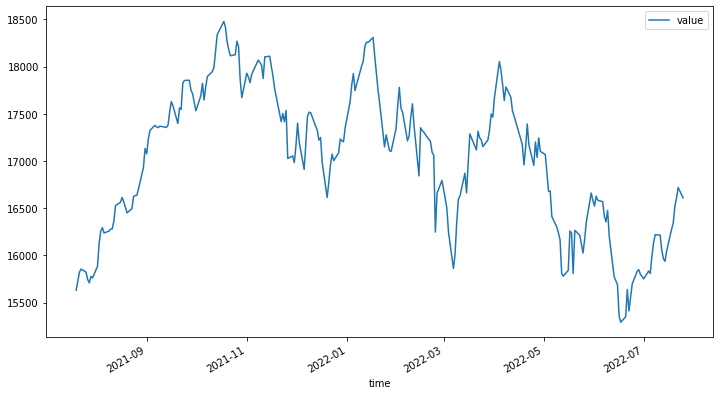

In [ ]:
#plot current data
%matplotlib inline
#Must pass the name of the value columns to plot
df_ts.plot(cols=['value'])
plt.show()

In [ ]:
#convert to pandas.DataFrame 
df_ts.to_dataframe().tail()

,time,value
248,2022-07-19,16340.55
249,2022-07-20,16520.85
250,2022-07-21,16605.25
251,2022-07-22,16719.45
252,2022-07-25,16609.90


In [ ]:
#convert to numpy.ndarray
df_ts.to_array()[0:5]

array([[Timestamp('2021-07-20 00:00:00'), 15632.1],
       [Timestamp('2021-07-22 00:00:00'), 15824.05],
       [Timestamp('2021-07-23 00:00:00'), 15856.05],
       [Timestamp('2021-07-26 00:00:00'), 15824.45],
       [Timestamp('2021-07-27 00:00:00'), 15746.45]], dtype=object)

In [ ]:
df_ts.is_empty()

False

In [ ]:
df_ts.is_univariate()

True

In [ ]:
##import the param and model classes for Prophet, then LSTM model.

##REF LINK-https://towardsdatascience.com/kats-a-generalizable-framework-to-analyze-time-series-data-in-python-3c8d21efe057

from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

## 1 st Method >> Facebook Prophet  #Results -Not Up to Mark
# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(df_ts, params)
# m.fit()
# fcst = m.predict(steps=10,freq = "B")  

##Take 15 mins to build the model
## 2 nd Method >> LSTM #Results- Good
##create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst = m.predict(steps=10,freq="B")  #Forecasting for next 10 Business Day's, Saturday and Sunday will get eliminated as Nifty 50 Index is closed on Weekends4


##Holt Winter ALGO supported by KATS > 3 rd Method. Results>> Good, Test HW using statsmodels library
##Documentation - https://facebookresearch.github.io/Kats/api/kats.models.holtwinters.html
# from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
# import warnings
# warnings.simplefilter(action='ignore')

# params = HoltWintersParams(
#             trend="mul",
#             seasonal="mul",
#             seasonal_periods=50,
#         )
# m = HoltWintersModel(
#     data=ts, 
#     params=params)

# m.fit()
# ## steps == seasonality periods, in Financial Data seasonality is not contant so it's difficult to set particular number.
# ## alpha is confidence interval ranging between 0 to 1
# fcst = m.predict(steps=30, alpha = 0.1)
# m.plot()

In [ ]:
#Forecasted Data
fcst.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2022-07-26,16606.058280,15775.755366,17436.361194
1,2022-07-27,16666.273579,15832.959900,17499.587258
2,2022-07-28,16580.639355,15751.607387,17409.671322
3,2022-07-29,16444.032956,15621.831308,17266.234604
4,2022-08-01,16217.609127,15406.728671,17028.489584
5,2022-08-02,15993.657371,15193.974502,16793.340239
6,2022-08-03,15799.712943,15009.727296,16589.698590
7,2022-08-04,15521.076871,14745.023028,16297.130715
8,2022-08-05,15236.421886,14474.600792,15998.242981
9,2022-08-08,15242.965186,14480.816927,16005.113446


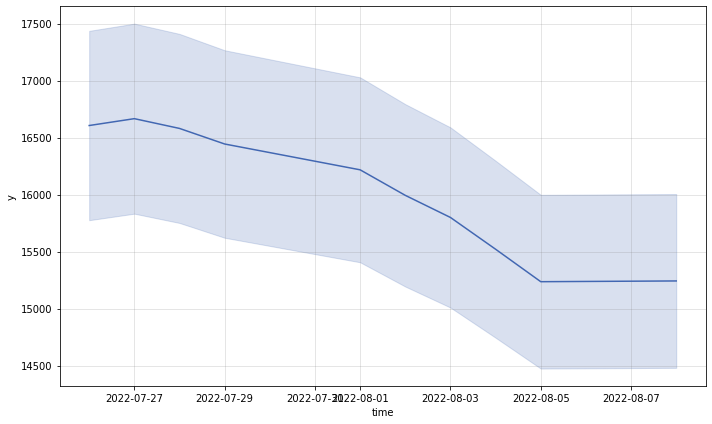

In [ ]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05','2021-12-06')
# plt.ylim(15000,20000)

In [ ]:
fcst = fcst.set_index('time')
# df = df.set_index('Date')
fcst

,fcst,fcst_lower,fcst_upper
time,,,
2022-07-26,16606.058280,15775.755366,17436.361194
2022-07-27,16666.273579,15832.959900,17499.587258
2022-07-28,16580.639355,15751.607387,17409.671322
2022-07-29,16444.032956,15621.831308,17266.234604
2022-08-01,16217.609127,15406.728671,17028.489584
2022-08-02,15993.657371,15193.974502,16793.340239
2022-08-03,15799.712943,15009.727296,16589.698590
2022-08-04,15521.076871,14745.023028,16297.130715
2022-08-05,15236.421886,14474.600792,15998.242981


In [ ]:
import plotly.graph_objects as go

fcst['fcst'] = fcst['fcst'].round(decimals = 2)
fcst['fcst_lower'] = fcst['fcst_lower'].round(decimals = 2)
fcst['fcst_upper'] = fcst['fcst_upper'].round(decimals = 2)

# Create traces
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst'],name = 'Forecast Data'))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_lower'],name = 'Lower Forecast Band',line_color = 'red',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_upper'],name = 'Upper Forecast Band',line_color = 'green',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=df.index, y=df.Close,mode='lines+markers',name='Actual Data'))

#https://plotly.com/python/continuous-error-bars/

fig = go.Figure([
    go.Scatter(
        name='Forecast Data',
        x=fcst.index,
        y=fcst['fcst'],
        mode='lines+markers',
        line=dict(color='rgb(50, 119, 180)'),
    ),
    go.Scatter(
        name='Actual Data',
        x=df_close['time'],
        y=df_close['value'],
        mode='lines+markers',
        fill='tonexty',
        line=dict(color='blue'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=fcst.index,
        y=fcst['fcst_upper'],
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        marker=dict(color="green"),
        line=dict(width=1.5),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=fcst.index,
        y=fcst['fcst_lower'],
        marker=dict(color="red"),
        line=dict(width=1.5),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

#Omitting Test Data, Testing Forcasting Model on Complete Data instead Training Dataset
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data.Close,mode='lines+markers', name='Test Data')) 

fig.update_layout(title='Nifty50 Last 1 Year Chart with Actual and Forecasted Data using KATS Algo',yaxis_title='Nifty 50',yaxis_tickformat= "000")
fig.update_traces( hovertemplate=None)
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")

fig.update_layout( xaxis_tickformat = ' %d %B (%a) %Y')
fig.show()

#Converting viz into HTML file,  ipynb file is not showing VIZ after uploading on Github
# pio.write_html(fig, file='Nifty50_Last_1_Year_Chart_with_Actual_and_Forecasted_Data_using_KATS_Algo.html', auto_open=True)


##ipynb file is not showing VIZ after uploading on Github.


##Snap-

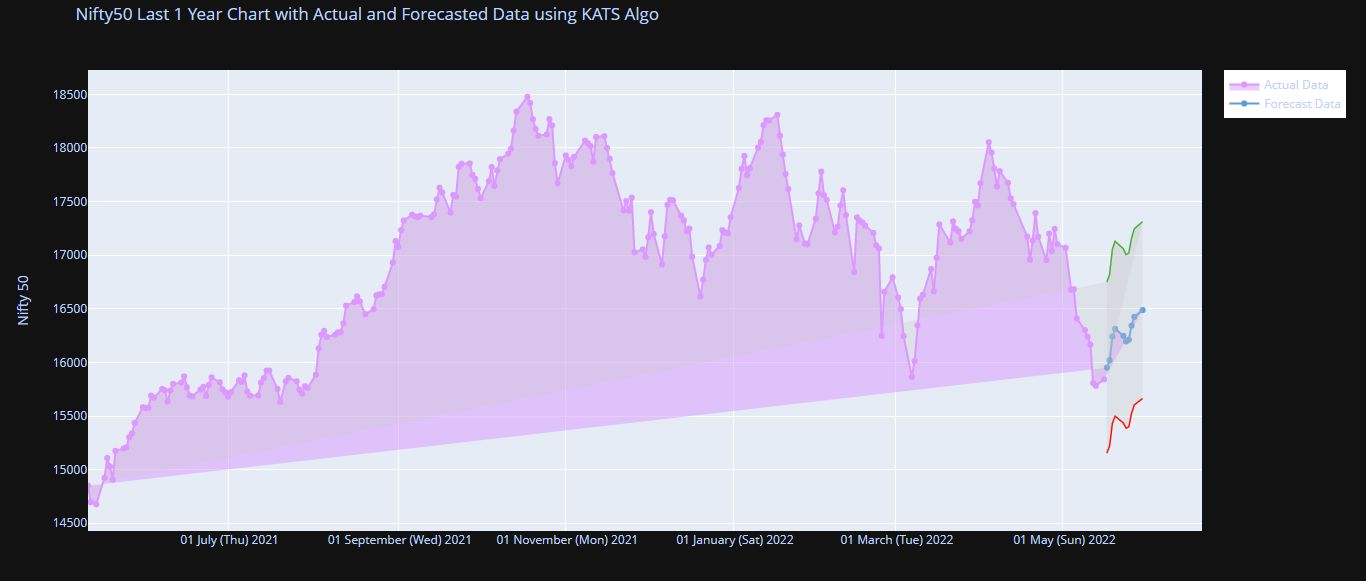

##USD/INR Currency Pair Forecasting Example


In [7]:
#Extracting Last 1 year data of NF using investpy library to pandas dataframe
today = datetime.now()
today = today.strftime("%d/%m/%Y")
one_year= datetime.today() - timedelta(days=370)
one_year = one_year.strftime("%d/%m/%Y")

usd_inr = investpy.get_currency_cross_historical_data(currency_cross='USD/INR', from_date=one_year, to_date=today)
usd_inr.head()

,Open,High,Low,Close,Currency
Date,,,,,
2021-07-26,74.442,74.534,74.338,74.340,INR
2021-07-27,74.279,74.546,74.279,74.504,INR
2021-07-28,74.526,74.534,74.310,74.500,INR
2021-07-29,74.383,74.432,74.219,74.248,INR
2021-07-30,74.256,74.454,74.249,74.344,INR


In [8]:
#import data file
# header = ["date","time","value"]
# df = pd.read_csv("EURUSD1440.csv", usecols=range(0,3), names=header)

In [9]:
#check data info
usd_inr.info()

usd_inr.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2021-07-26 to 2022-07-29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      265 non-null    float64
 1   High      265 non-null    float64
 2   Low       265 non-null    float64
 3   Close     265 non-null    float64
 4   Currency  265 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.4+ KB


DatetimeIndex(['2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29'],
              dtype='datetime64[ns]', name='Date', length=265, freq=None)

In [10]:
#pd.to_datetime
usd_inr.reset_index(inplace = True)
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      265 non-null    datetime64[ns]
 1   Open      265 non-null    float64       
 2   High      265 non-null    float64       
 3   Low       265 non-null    float64       
 4   Close     265 non-null    float64       
 5   Currency  265 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.5+ KB


In [11]:
#show pd.datetime applied
usd_inr_close = usd_inr[["Date","Close"]]
usd_inr_close

,Date,Close
0,2021-07-26,74.340
1,2021-07-27,74.504
2,2021-07-28,74.500
3,2021-07-29,74.248
4,2021-07-30,74.344
...,...,...
260,2022-07-25,79.691
261,2022-07-26,79.843
262,2022-07-27,79.845
263,2022-07-28,79.626


In [12]:
#Adding 'time' and 'value' column in Dataframe as Columne name "Close" and "Date" is not working in Algo

usd_inr_close["time"] = usd_inr_close['Date']
usd_inr_close["value"] = usd_inr_close['Close']
del usd_inr_close["Date"]
del usd_inr_close["Close"]
usd_inr_close.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,value
0,2021-07-26,74.340
1,2021-07-27,74.504
2,2021-07-28,74.500
3,2021-07-29,74.248
4,2021-07-30,74.344


In [13]:
#construct TimeSeriesData object for each time series
df_ts_usd_inr = TimeSeriesData(usd_inr_close)
print(type(df_ts_usd_inr.time))
print(type(df_ts_usd_inr.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
df_ts_usd_inr

,time,value
0,2021-07-26,74.340
1,2021-07-27,74.504
2,2021-07-28,74.500
3,2021-07-29,74.248
4,2021-07-30,74.344
...,...,...
260,2022-07-25,79.691
261,2022-07-26,79.843
262,2022-07-27,79.845
263,2022-07-28,79.626


In [15]:
# #plot current data
# %matplotlib inline
# #Must pass the name of the value columns to plot
# df_ts_usd_inr(cols=['value'])
# plt.show()

In [16]:
#examples below in case needed in the future

In [17]:
#convert to pandas.DataFrame 
df_ts_usd_inr.to_dataframe().tail()

,time,value
260,2022-07-25,79.691
261,2022-07-26,79.843
262,2022-07-27,79.845
263,2022-07-28,79.626
264,2022-07-29,79.336


In [18]:
#convert to numpy.ndarray
df_ts_usd_inr.to_array()[0:5]

array([[Timestamp('2021-07-26 00:00:00'), 74.34],
       [Timestamp('2021-07-27 00:00:00'), 74.504],
       [Timestamp('2021-07-28 00:00:00'), 74.5],
       [Timestamp('2021-07-29 00:00:00'), 74.248],
       [Timestamp('2021-07-30 00:00:00'), 74.344]], dtype=object)

In [19]:
df_ts_usd_inr.is_empty()

False

In [20]:
df_ts_usd_inr.is_univariate()

True

In [28]:
#import the param and model classes for Prophet, then LSTM model.
from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

##Method 1 - Facebook Prophet,results are not upto mark ,will require parameter tuning
# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(df_ts_usd_inr, params)
# m.fit()
# fcst = m.predict(steps=24)


###Method -2 LSTM , Takes 15 mins to Build and Forecast,but results are good
#create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts_usd_inr, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-10GMT (96 M15 periods)
fcst_usd_inr = m.predict(steps=10,freq="B")

In [29]:
fcst_usd_inr.head(20)

,time,fcst,fcst_lower,fcst_upper
0,2022-08-01,79.402681,75.432547,83.372815
1,2022-08-02,79.500321,75.525305,83.475338
2,2022-08-03,79.597017,75.617166,83.576867
3,2022-08-04,79.540316,75.563301,83.517332
4,2022-08-05,79.477953,75.504055,83.451851
5,2022-08-08,79.526907,75.550561,83.503252
6,2022-08-09,79.622150,75.641042,83.603257
7,2022-08-10,79.670034,75.686532,83.653536
8,2022-08-11,79.657160,75.674302,83.640018
9,2022-08-12,79.638512,75.656586,83.620438


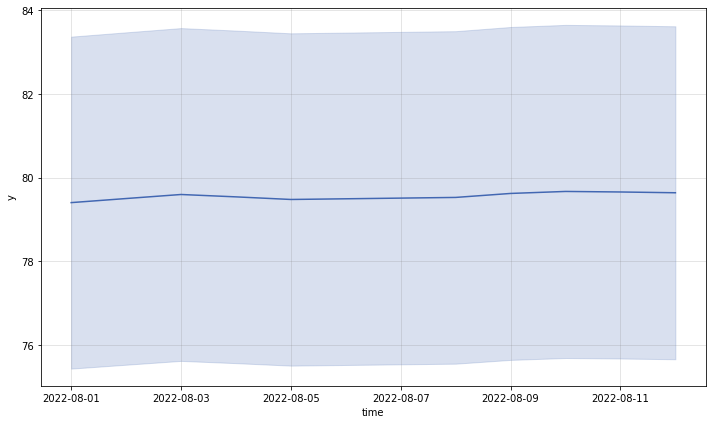

In [30]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05 00:00:00','2021-12-06 12:00:00')
# plt.ylim(1.16,1.23)

In [31]:
fcst_usd_inr = fcst_usd_inr.set_index('time')
# df = df.set_index('Date')
fcst_usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-08-01 to 2022-08-12
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fcst        10 non-null     float64
 1   fcst_lower  10 non-null     float64
 2   fcst_upper  10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


In [32]:
import plotly.graph_objects as go

# fcst_usd_inr['fcst'] = fcst_usd_inr['fcst'].round(decimals = 3)
# fcst_usd_inr['fcst_lower'] = fcst_usd_inr['fcst_lower'].round(decimals = 3)
# fcst_usd_inr['fcst_upper'] = fcst_usd_inr['fcst_upper'].round(decimals = 3)

# Create traces
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst'],name = 'Forecast Data'))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_lower'],name = 'Lower Forecast Band',line_color = 'red',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_upper'],name = 'Upper Forecast Band',line_color = 'green',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=df.index, y=df.Close,mode='lines+markers',name='Actual Data'))

#https://plotly.com/python/continuous-error-bars/

fig = go.Figure([
    go.Scatter(
        name='Forecast Data',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst'],
        mode='lines+markers',
        line=dict(color='rgb(50, 119, 180)'),
    ),
    go.Scatter(
        name='Actual Data',
        x=usd_inr_close['time'],
        y=usd_inr_close['value'],
        mode='lines+markers'
    ),
    go.Scatter(
        name='Upper Bound',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst_upper'],
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        marker=dict(color="green"),
        line=dict(width=1.5),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst_lower'],
        marker=dict(color="red"),
        line=dict(width=1.5),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

#Omitting Test Data, Testing Forcasting Model on Complete Data instead Training Dataset
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data.Close,mode='lines+markers', name='Test Data')) 

fig.update_layout(title='USD/INR_Last_1_Year_Chart_with_Actual_and_Forecasted)Data_using_KATS(LSTM)Algo',yaxis_title='USD/INR')
fig.update_traces( hovertemplate=None)
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")

fig.update_layout( xaxis_tickformat = ' %d %B (%a) %Y')
fig.show()

#Converting viz into HTML file , ipynb file is not showing VIZ after uploading on Github
pio.write_html(fig, file='USD_INR_Last_1_Year_Chart_with_Actual_and_Forecasted_Data_using_KATS_Algo.html', auto_open=True)


##ipynb file is not showing VIZ after uploading on Github.


Snap-

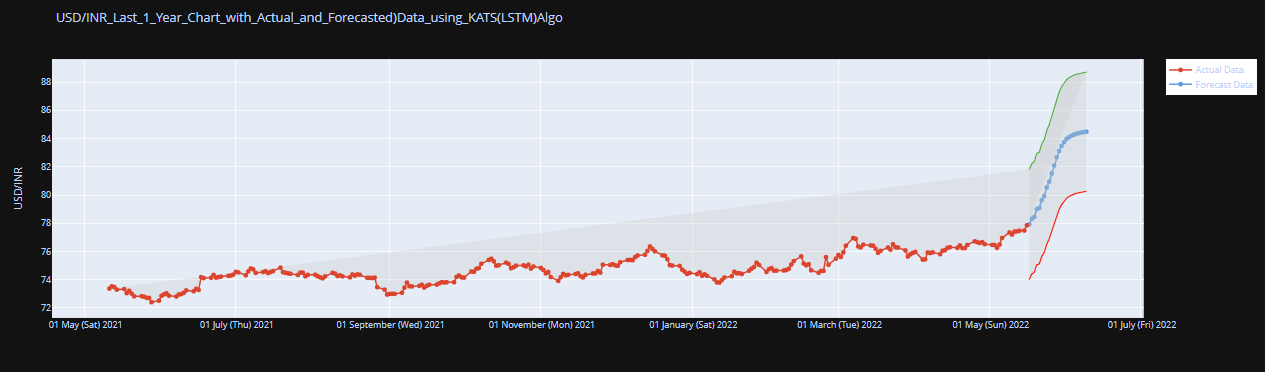

In [ ]:
# #try CUSUM
# import numpy as np

# from kats.consts import TimeSeriesData
# from kats.detectors.cusum_detection import CUSUMDetector

# #changepoints
# change_points = CUSUMDetector(eurusd15_ts).detector()
# change_points.plot()
 

In [ ]:
#do the below after ensemble

In [ ]:
# #preprocessing complete, start model
# from kats.consts import TimeSeriesData
# eurusd15_ts = TimeSeriesData(eurusd15_df)

In [ ]:
# #GetMetaData
# from kats.models.metalearner.get_metadata import GetMetaData
# MD = GetMetaData(data = eurusd15_ts)